In [1]:
import requests
from pathlib import Path
from zipfile import ZipFile

Path('./data/raw').mkdir(parents=True, exist_ok=True)
Path('./data/processed').mkdir(parents=True, exist_ok=True)

PROJETO_URL = 'https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/05/aula-5-inicio.zip'

with open('./data/raw/file.zip', 'wb') as file:
  file.write(requests.get(PROJETO_URL).content)
  file.close()

with ZipFile('./data/raw/file.zip') as zip_file:
  zip_file.extractall('./data/processed')
  zip_file.close()


# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Solução do problema com dependência do statsmodels

In [2]:
# !pip install scipy==1.2 --upgrade

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import probplot

### Importe o dataset

In [4]:
CSV_PATH = './data/processed/aula-5-inicio/dados_projeto.csv'

df = pd.read_csv(CSV_PATH, sep=';')

### Visualize o conteúdo do DataFrame

In [5]:
df.head()

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


### Obtenha e avalie as estatísticas descritivas dos dados

In [6]:
df.describe()

,Y,X
count,365.000000,365.000000
mean,25401.367123,21.226356
std,4399.142703,3.180108
min,14343.000000,12.900000
25%,22008.000000,19.020000
50%,24867.000000,21.380000
75%,28631.000000,23.280000
max,37937.000000,28.860000


In [7]:
df.shape

(365, 2)

### Análise gráfica
### Construa um box plot para cada variável do dataset

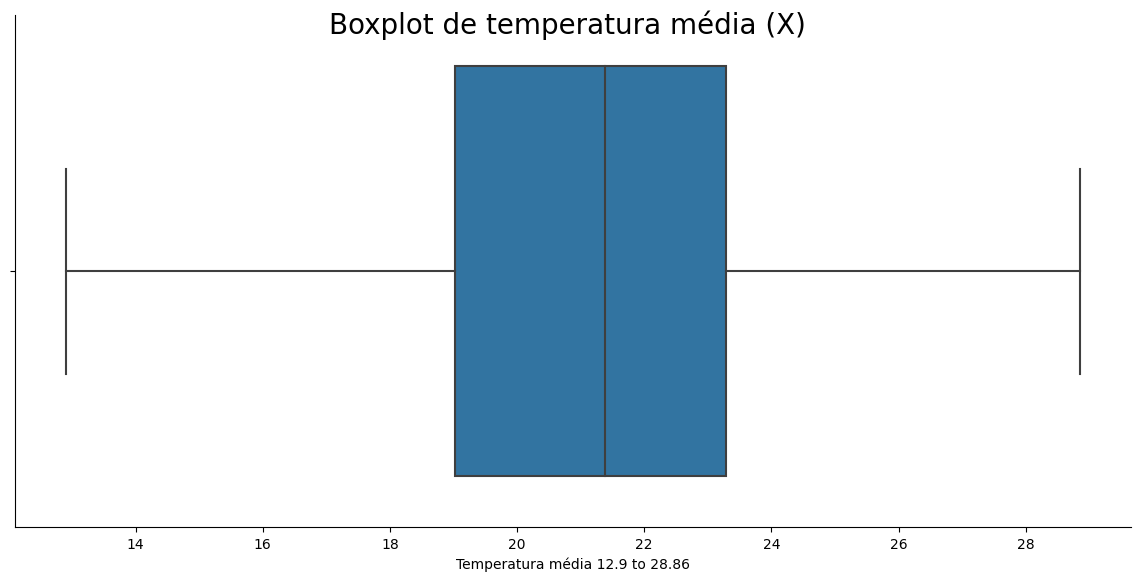

In [8]:
ax = sns.catplot(data=df,
            x='X',
            orient='h',
            kind='box')

ax.figure.set_size_inches(12, 6)
ax.fig.suptitle('Boxplot de temperatura média (X)', fontsize=20)
ax.set(xlabel=f'Temperatura média {df["X"].min()} to {df["X"].max()}')

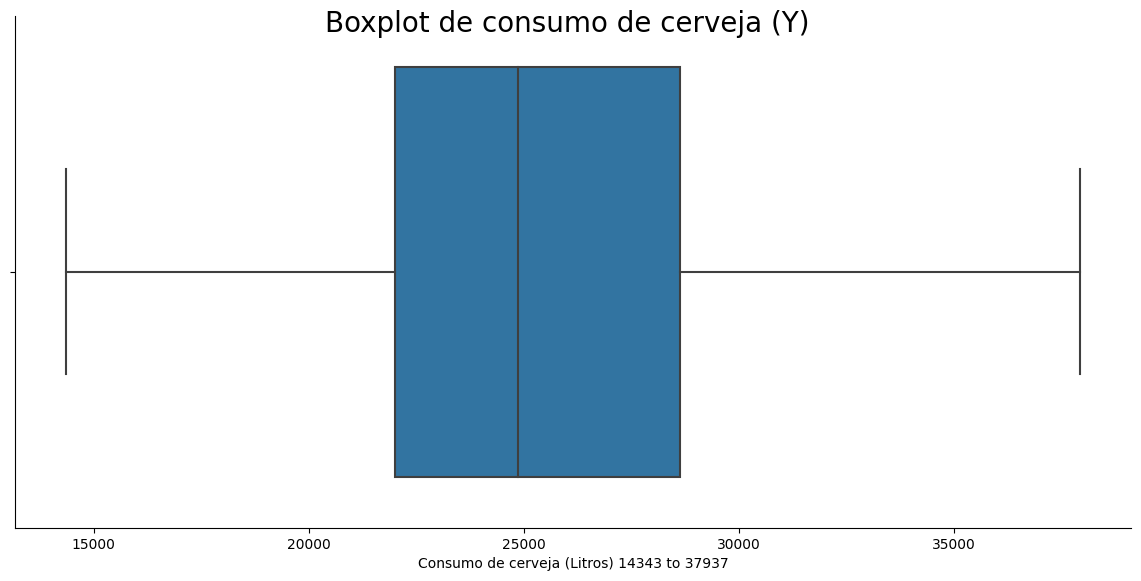

In [9]:
ax = sns.catplot(data=df,
            x='Y',
            orient='h',
            kind='box')

ax.figure.set_size_inches(12, 6)
ax.fig.suptitle('Boxplot de consumo de cerveja (Y)', fontsize=20)
ax.set(xlabel=f'Consumo de cerveja (Litros) {df["Y"].min()} to {df["Y"].max()}')

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

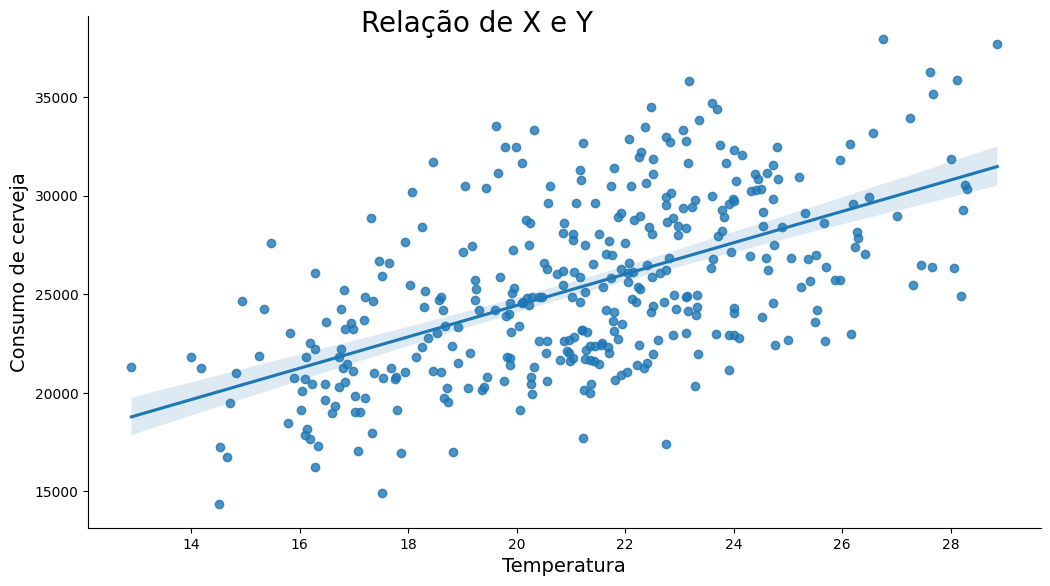

In [10]:
ax = sns.lmplot(data=df,
                x='X',
                y='Y')

ax.figure.set_size_inches(12, 6)
ax.fig.suptitle('Relação de X e Y', fontsize=20)
ax.set_xlabels('Temperatura', fontsize=14)
ax.set_ylabels('Consumo de cerveja', fontsize=14)

### <font color='red'>Utilizando a matriz de correlação</font>

In [11]:
df.corr()

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


<Axes: >

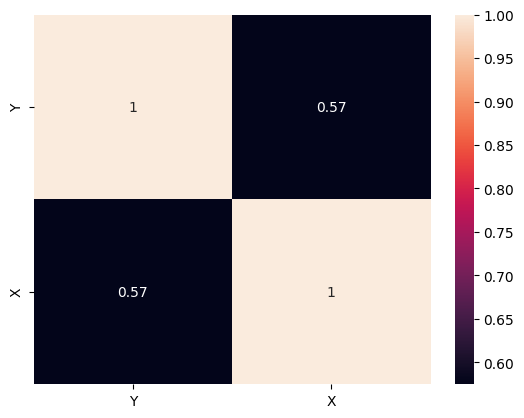

In [12]:
sns.heatmap(df.corr(),
            annot=True)

### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: Existe uma fraca correlação entre 'X' e 'Y'

É possível quantificar a intensidade dessa relação?

Resp.: A métrica de correlação de pearson entre 'Y' e 'Y' é 0.57

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.: Por ser uma fraca correlação, é precipitado fazer, sem prévio estudo mais analítico, uma afirmação de causalidade.

### Prepare os dados para estimar um modelo de regressão linear simples

In [13]:
Y = df['Y']
X = sm.add_constant(df['X'])

### Estime o modelo de regressão linear simples

In [14]:
model_sm_reg = sm.OLS(Y, X).fit()

### Visualize o resultado da regressão

In [15]:
print(model_sm_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.87e-33
Time:                        20:14:43   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

### Obtenha o $Y$ previsto

In [16]:
df['Y_hat'] = model_sm_reg.predict()
df.head()

,Y,X,Y_hat
0,25461,27.30,30229.200544
1,28972,27.02,30006.633434
2,30814,24.82,28257.891852
3,29799,23.98,27590.190521
4,28900,23.82,27463.009315


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [19]:
model_sm_reg.predict([1, 42])[0]

41913.97383816628

### Obtenha os resíduos da regressão

In [20]:
df['Residuos'] = model_sm_reg.resid

df.head()

,Y,X,Y_hat,Residuos
0,25461,27.30,30229.200544,-4768.200544
1,28972,27.02,30006.633434,-1034.633434
2,30814,24.82,28257.891852,2556.108148
3,29799,23.98,27590.190521,2208.809479
4,28900,23.82,27463.009315,1436.990685


### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

Text(0, 0.5, 'Residuos')

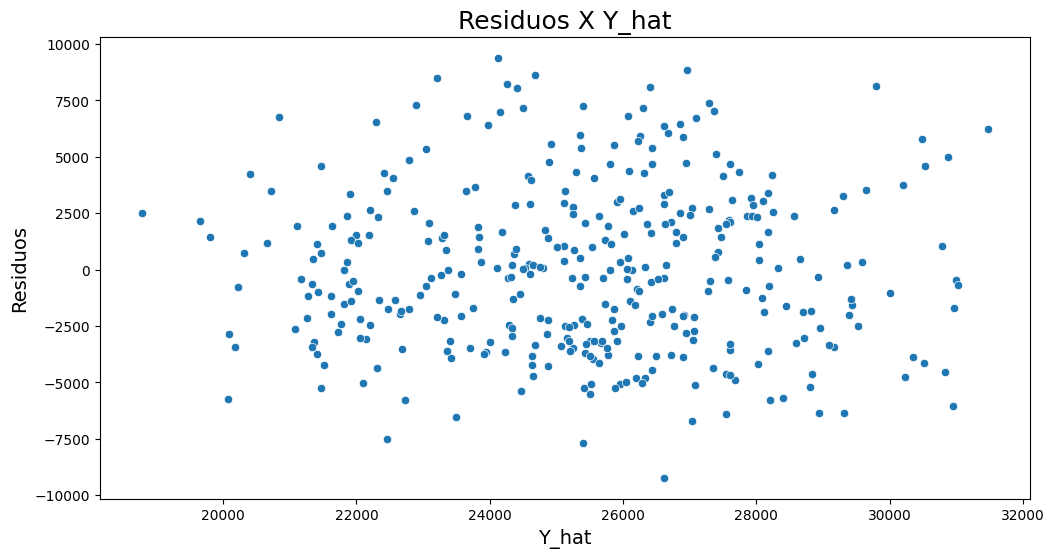

In [21]:
ax = sns.scatterplot(x=df['Y_hat'], y=df['Residuos'])

ax.figure.set_size_inches(12, 6)

ax.set_title('Residuos X Y_hat', fontsize=18)
ax.set_xlabel('Y_hat', fontsize=14)
ax.set_ylabel('Residuos', fontsize=14)

### Obtenha o QQPlot dos resíduos

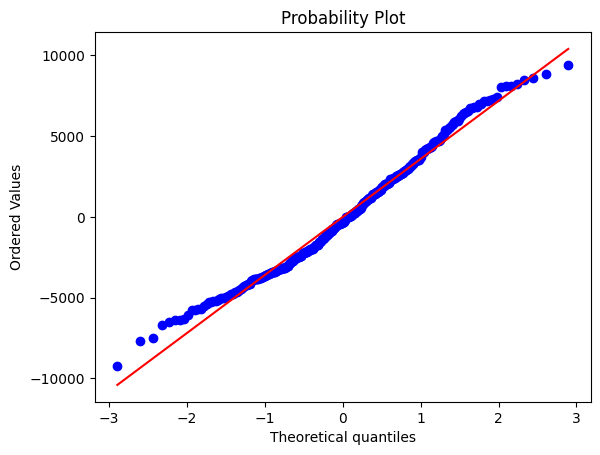

In [22]:
(_, (_, _, _)) = probplot(df['Residuos'], plot=plt)

### <font color='red'>A partir dos outputs acima, qual conclusão podemos tirar sobre o comportamento dos resíduos?</font>

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

In [23]:
SQE = model_sm_reg.ssr
SQE

4718394688.067693

In [24]:
SQR = model_sm_reg.ess
SQR

2325899486.7377863

In [25]:
SQT = SQR + SQE
SQT

7044294174.805479

In [26]:
R2 = SQR / SQT
R2

0.33018204933243206

In [27]:
model_sm_reg.rsquared

0.330182049332432